### PCA실습

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

columns=['sepal_length','sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


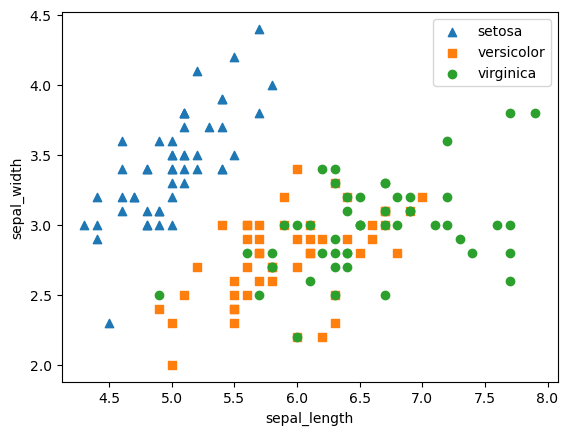

In [20]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

- 평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환

In [21]:
from sklearn.preprocessing import StandardScaler

iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [22]:
(irisDF.iloc[:,:-1]).shape

(150, 4)

- PCA 변환 수행

In [23]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)
#iris_pca=pca.fit_transform(iris_scaled)

(150, 2)


In [24]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


- PCA로 차원 축소된 피처들로 데이터 산포도 시각화

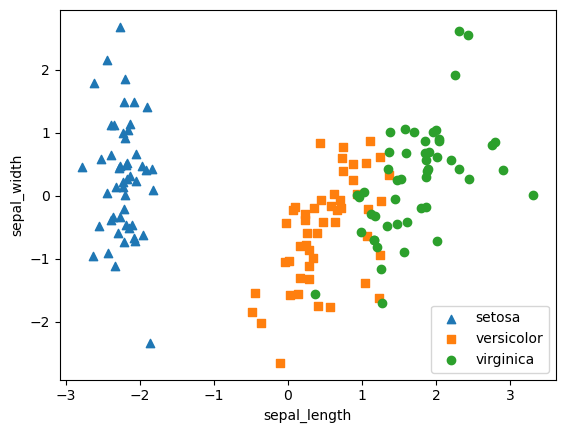

In [25]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

- 각 PCA Component별 변동성 비율

In [26]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target,scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도', scores)
print('원본 데이터 평균 정확도', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 [0.98 0.94 0.96]
원본 데이터 평균 정확도 0.96


In [30]:
pca_X=irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca=cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA변환 데이터 평균 정확도: 0.88


### 신용카드 데이터 세트 TA

- 데이터 로드 및 컬럼명 변환

In [6]:
!pip install xlrd
!pip install openpyxl

  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 325.1 kB/s eta 0:00:01
   -------------------------------------- - 92.2/96.5 kB 655.4 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 612.0 kB/s eta 0:00:00


In [14]:
import pandas as pd
pd.set_option('display.max_columns',30)

df=pd.read_excel('pca_credit_card.xls', header=1, sheet_name='Data').iloc[:,1:]
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target=df['default']
X_feature=df.drop('default',axis=1)

In [19]:
X_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

- 피처간 상관도 시각화

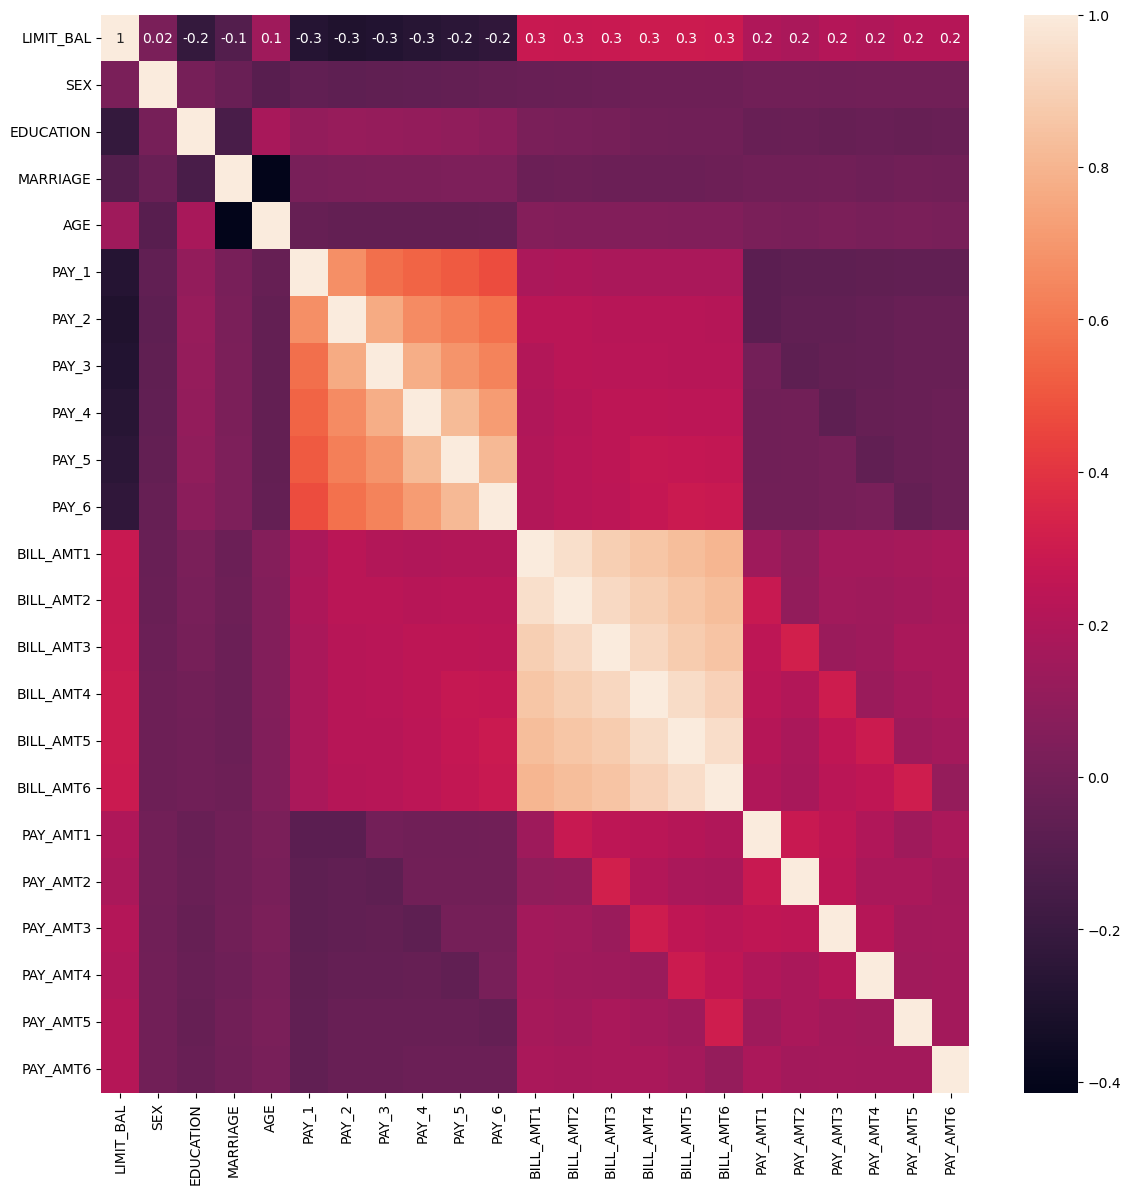

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_feature.corr()
plt.figure(figsize=(14,14))

sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill=['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_feature[cols_bill])

pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf, X_feature, y_target, scoring='accuracy', cv=3)

print(scores)
print(np.mean(scores))

[0.8083 0.8196 0.8232]
0.8170333333333333


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_feature)

pca=PCA(n_components=6)
df_pca=scaler.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print(scores_pca)
print(np.mean(scores_pca))

[0.8083 0.8194 0.8229]
0.8168666666666665


- LDA 붓꽃 데이터

In [41]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

In [42]:
lda=LinearDiscriminantAnalysis(n_components=2)
#target값 호출
lda.fit(iris_scaled, iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


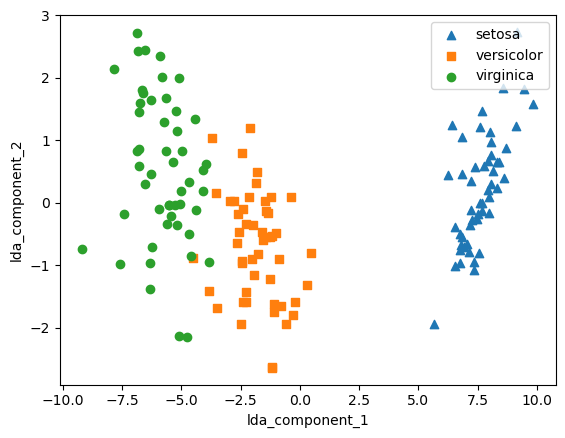

In [43]:
lda_columns=['pca_component_1','pca_component_2']
irisDF_lda=pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=irisDF_lda[irisDF_lda['target']==i]['pca_component_1']
    y_axis_data=irisDF_lda[irisDF_lda['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### SVD

In [59]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- SVD 행렬 분해

In [60]:
U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma.matrix:\n', np.round(Sigma, 3))
print('Vt matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma.matrix:
 [3.423 2.023 0.463 0.079]
Vt matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- 분해된 행렬들을 다시 원행렬로 원복

In [61]:
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 데이터 의존도가 높은 원본 데이터 행렬 생성

In [62]:
a[2]=a[0]+a[1]
a[3]-a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [ 0.402 -0.191  1.404 -1.969]]


In [63]:
U, Sigma, Vt=svd(a)
print('Sigma.matrix:\n', np.round(Sigma, 3))

Sigma.matrix:
 [2.832 2.182 0.599 0.   ]


In [64]:
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
Vt_=Vt[:2]
print(U.shape, Sigma.shape, Vt.shape)
a_=np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 4) (4,) (4, 4)
[[ 0.16  -0.412 -0.42  -0.257]
 [-0.406  1.21   1.584  0.33 ]
 [-0.246  0.798  1.164  0.073]
 [ 0.352 -0.175  1.383 -1.993]]


- Truncated SVD를 이용한 행렬 분해

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- PCA는 truncatedSVD를 사용함

Text(0, 0.5, 'Truncated component2')

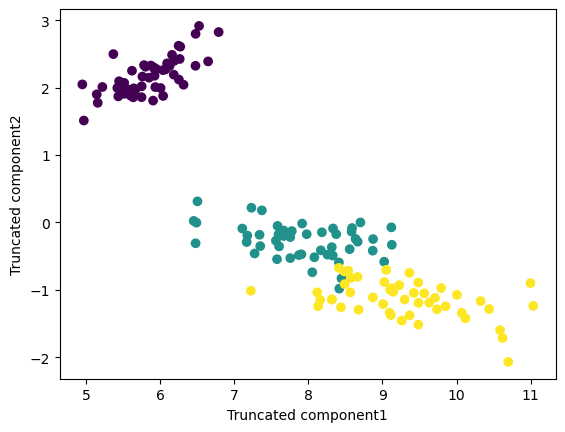

In [77]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
tsvd=TruncatedSVD(n_components=2)

tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)
plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('Truncated component1')
plt.ylabel('Truncated component2')

### NMF

C:\Users\a0103\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


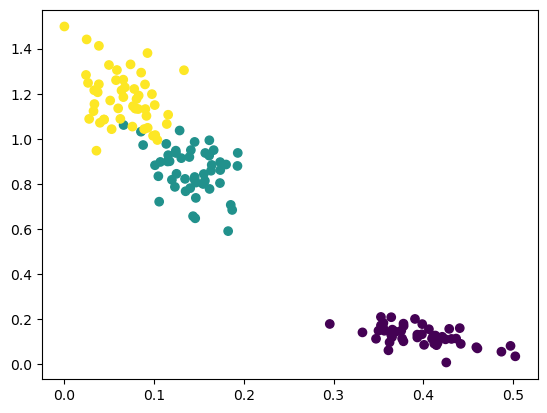

In [73]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)

nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)